# Jupyter notebook containing the necessary python scripts used to obtain the results from the paper titled "Linking globular cluster formation at low and high redshift through the age-metallicity relation in E-MOSAICs".

In order to run this code you will need the following python modules: numpy, matplotlib, tqdm, dill and astropy. You will also need access to the new E-MOSAICS numerical simulations (34Mpc3 volume), with LMC and SMC-mass galaxies selected. Moreover, for the AMR of field stars you will need access to the EAGLE numerical simulations.

In [1]:
from astropy.io import fits
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle

# Get the AMR for EAGLE galaxies of different mass

In [2]:
# import data
# there was a python2 python3 issue when loading the numpy array Joel sent, so I just copied and pasted the values and created individual arrays... (it works so feck it)
data_galaxies = np.load('/Users/danny/Desktop/AMR-MCs/data/galaxy_age_FeH.npy', allow_pickle=True,encoding="latin1")
# data_galaxies = np.array(data_galaxies)
MassBins = [7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5]
ageBins = [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.]
median_age = [[0.503855767880264, 1.524943661945649, 2.5133772948098247, 3.5102982222250088, 4.507774887260936, 5.513875098184853, 6.49380685432184, 7.5137868854029115, 8.496077520280016, 9.49177549711803, 10.503102752887024, 11.490742660161548, 12.516165496945701, 13.183940081816969], [0.509633731109739, 1.4946116269952885, 2.515309234507166, 3.49794629919702, 4.492346417368504, 5.501212516319892, 6.490925928320436, 7.483076376689244, 8.496077520280016, 9.49740442099516, 10.505973017617727, 11.456500194922453, 12.478621467996188, 13.197426908587566], [0.5075323567991923, 1.5057376146094121, 2.510479572671782, 3.512126960219515, 4.504347335985575, 5.50794156401528, 6.501723117061658, 7.492045993358841, 8.490821211529498, 9.486370364592723, 10.479692485296313, 11.460127503151906, 12.445200208115448, 13.203926036108593], [0.5075323567991923, 1.5102878924144978, 2.511445455058926, 3.5048095658685785, 4.50220544656162, 5.50556703473802, 6.509273552909976, 7.5013261273436, 8.494418250065756, 9.490051199070722, 10.476257833868456, 11.45986877245284, 12.39091027073721, 13.198537945529102], [0.5185606264184273, 1.5153428105883506, 2.5095137152813205, 3.511212104394245, 4.511200662793696, 5.511107004958612, 6.506757417040913, 7.503563644883248, 8.507680087012819, 9.503370447177431, 10.477343174263519, 11.486136602356304, 12.360433096764469, 13.20282459539981], [0.4949239070672373, 1.5118041926218062, 2.511204682038194, 3.5211550605766053, 4.530884644945644, 5.516248773052427, 6.535652858691046, 7.545647257035642, 8.506299995009275, 9.512563047955314, 10.48691231781816, 11.434622331899844, 12.373950023910137, 13.178092089048217]]
# median_Z = [[-0.37711053100613084, -0.3725226722443891, -0.43879337682589636, -0.4829852290632214, -0.5389764786520914, -0.5611420362190145, -0.6000613284257745, -0.626632273452326, -0.7163526512285919, -0.836123050298037, -1.0360909729649261, -1.304900015110064, -1.7598098727423683, -2.4587314434393557], [-0.25247380482942305, -0.2844408215341144, -0.33895363420744695, -0.37904330158875865, -0.41928163032175425, -0.4815176042166336, -0.523111294862348, -0.6039316095956064, -0.6931622130891499, -0.8377267267219433, -1.0406347076598637, -1.2547509436536988, -1.6922705662834006, -2.3400836660219566], [-0.15943441144554465, -0.18862327422861855, -0.21808517882274495, -0.25806383927926957, -0.29674426960194156, -0.360451754487397, -0.43793046501017024, -0.5132722463184365, -0.6022105935843204, -0.7341705288832823, -0.9126666818648325, -1.1548895418977, -1.5871764449243764, -2.359416528010546], [-0.0007292224735198764, -0.030101922069269104, -0.05059196705898526, -0.08639590149383189, -0.1418471040785775, -0.19951761126134873, -0.28405745223894147, -0.3588396739316959, -0.45964141187710345, -0.5971415691394065, -0.7684107924155459, -1.0262392541747904, -1.435818395555381, -2.212649538686374], [0.12842820209040934, 0.11420556405640242, 0.09503014472171713, 0.09656760975855551, 0.07220041388715034, 0.03268223853920123, -0.006061751351309362, -0.11160730771714096, -0.21313645009124785, -0.35670782610670504, -0.495356742169997, -0.7765285680785243, -1.1869533025012804, -2.116278934618089], [0.16110191333266133, 0.15024386354841768, 0.1710941458802775, 0.1756638266592014, 0.1679573844117984, 0.13431774359406046, 0.12665011603046317, 0.06319857471644427, -0.020792476463490965, -0.10990005891590127, -0.33843044979982945, -0.5441922785179959, -0.7395056224666443, -1.8181513698114564]]
median_feh = [[-0.5929919777020471, -0.6227214211544418, -0.6707968868534144, -0.7198681054642122, -0.7616179152111249, -0.8071845614082491, -0.8324832704037566, -0.8935841981232775, -0.9739673294924991, -1.1004897438996715, -1.2964983830238213, -1.5836349346074607, -2.0449306873359507, -2.7903818706966197], [-0.5175043045316203, -0.5479381272501149, -0.6099202075401458, -0.6715659674081604, -0.7192886924001245, -0.7636173045073829, -0.8137187521202209, -0.8784687916610956, -0.981173698409814, -1.0939394731085432, -1.2944738467375378, -1.547061189629499, -1.947410475593271, -2.6453063101288405], [-0.356526693315405, -0.37990735023718525, -0.43073017048241, -0.47648747668824765, -0.5198126082991024, -0.5819495017883041, -0.6597417926738571, -0.7442581854878181, -0.8702094513342118, -1.0331259219834361, -1.2278458562407586, -1.4686414516098916, -1.830213964408681, -2.5434979153073947], [-0.17430066818785095, -0.2240387011334688, -0.2746062250409962, -0.3297612812195738, -0.3725232480381455, -0.420272571109817, -0.4990475302592574, -0.6062378504313755, -0.719082270398907, -0.8753066487245349, -1.1149803066321646, -1.4008904392805963, -1.8035053482631898, -2.574439632256877], [-0.04264522465524889, -0.07058518520166057, -0.1003609304198898, -0.14887001105774877, -0.19093358871872912, -0.24462653940170753, -0.29709997484693984, -0.3711994089934407, -0.47642856856956417, -0.6430932590755218, -0.9007896453939201, -1.213070013603072, -1.638494920602708, -2.434327616713377], [0.05457020167010462, 0.04055246779082822, 0.05369815726734739, 0.021444800916142093, -0.031672928947216406, -0.07709129022645067, -0.11374649531949643, -0.1525768183750662, -0.23909504990467667, -0.4192483309981039, -0.6287073410765642, -0.9729860468511702, -1.400599863538579, -2.1083357104341514]]

MassBins= np.array(MassBins)
ageBins= np.array(ageBins)
median_age= np.array(median_age)
median_feh= np.array(median_feh)


In [3]:
np.save('/Users/danny/Desktop/median_age',median_age)
np.save('/Users/danny/Desktop/median_feh',median_feh)



# Fig 1. AMR of field populations for different mass galaxies in EAGLE

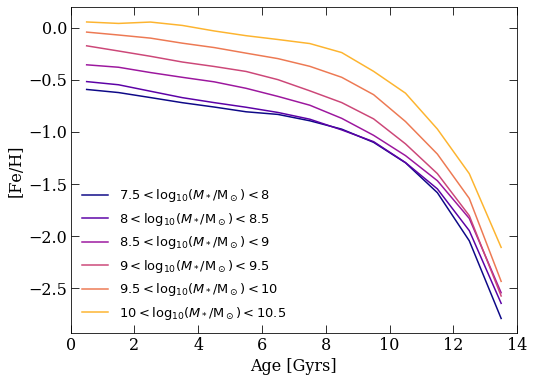

In [4]:
midAge = (ageBins[1:]+ageBins[:-1])/2.

plt.figure(figsize=(8,6))
plt.rc('font',family='serif',size=16)
for i in range(len(MassBins)-1):
    c = plt.cm.plasma( i/float(len(MassBins)-1) )
    plt.plot(midAge, median_feh[i], '-', c=c, label='$%g < \log_{10}(M_*/\mathrm{M}_\odot) < %g$'%(MassBins[i],MassBins[i+1]) )

plt.xlabel('Age [Gyrs]')
plt.ylabel('[Fe/H]')
plt.legend(loc='lower left',frameon=False,fontsize=13)
plt.xlim(0,14)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8)


# Use centrals (McConnachie+Linear) to determine the AMR of GCs in LMC and SMC galaxies in E-MOSAICS, and compare it to MW analogues

In [6]:
path = '/Users/danny/Desktop/AMR-MCs/data/MC_data_2/'
# load the data for the LMC and SMC centrals
data_lmc_cen = np.loadtxt(path+'LMCs_centrals_mcconnachie_linear.dat', delimiter=" ",skiprows=1)
data_smc_cen = np.loadtxt(path+'SMCs_centrals_mcconnachie_linear.dat', delimiter=" ",skiprows=1)

In [7]:
# get the average AMR for the centrals
# LMC
bins_lmc_cen = np.linspace(data_lmc_cen[:,4].min(),data_lmc_cen[:,4].max(), 20)
delta_lmc_cen = bins_lmc_cen[1]-bins_lmc_cen[0]
idx_lmc_cen  = np.digitize(data_lmc_cen[:,4],bins_lmc_cen)
running_median_amr_lmc_cen = np.array([np.median(data_lmc_cen[:,5][idx_lmc_cen==k]) for k in range(20)])
running_sig_amr_lmc_cen = np.array([np.std(data_lmc_cen[:,5][idx_lmc_cen==k]) for k in range(20)])
# SMC
bins_smc_cen = np.linspace(data_smc_cen[:,4].min(),data_smc_cen[:,4].max(), 20)
delta_smc_cen = bins_smc_cen[1]-bins_smc_cen[0]
idx_smc_cen  = np.digitize(data_smc_cen[:,4],bins_smc_cen)
running_median_amr_smc_cen = np.array([np.median(data_smc_cen[:,5][idx_smc_cen==k]) for k in range(20)])
running_sig_amr_smc_cen = np.array([np.std(data_smc_cen[:,5][idx_smc_cen==k]) for k in range(20)])


/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
# and for the MW analogues!
import os
MW_files = []
for i in os.listdir('/Users/danny/Desktop/AMR-MCs/data/age_feh_zooms/'):
    if i.endswith('.dat'):
        MW_files.append(i)

In [9]:
import readmodule as rm
# REMEMBER these are the GCs associated to the MWs! Not the MW values
MW_data = []
MW_ages = []
MW_rgc = []
MW_mass = []
MW_fehs = []
MW_p_k = []

for i in MW_files:
    file=rm.read()
    file.readfile('/Users/danny/Desktop/AMR-MCs/data/age_feh_zooms/'+i)
#     MW_data.append(file)
    MW_ages = np.concatenate((MW_ages,file['age']),axis=0)
    MW_rgc = np.concatenate((MW_rgc,file['r_GC']),axis=0)
    MW_mass = np.concatenate((MW_mass,file['mass']),axis=0)
    MW_fehs = np.concatenate((MW_fehs,file['Fe/H']),axis=0)
    MW_p_k = np.concatenate((MW_p_k,file['P/k']),axis=0)

In [10]:
bins_mw_cen = np.linspace(MW_ages.min(),MW_ages.max(), 20)
delta_mw_cen = bins_mw_cen[1]-bins_mw_cen[0]
idx_mw_cen  = np.digitize(MW_ages,bins_mw_cen)
running_median_amr_mw_cen = np.array([np.median(MW_fehs[idx_mw_cen==k]) for k in range(20)])
running_sig_amr_mw_cen = np.array([np.std(MW_fehs[idx_mw_cen==k]) for k in range(20)])


# Fig 2. Comparison of AMR for MW, LMC and SMC galaxies in E-MOSAICS

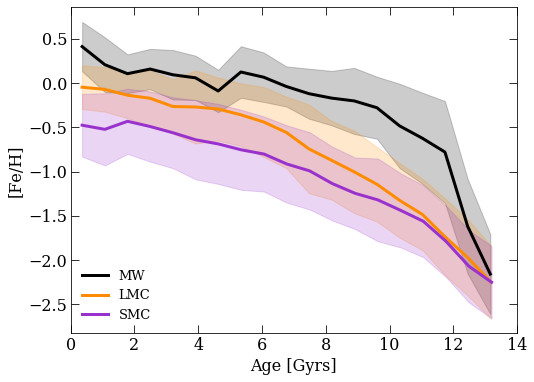

In [11]:

plt.figure(figsize=(8,6))
plt.rc('font',family='serif',size=16)
plt.fill_between(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen-running_sig_amr_mw_cen,running_median_amr_mw_cen+running_sig_amr_mw_cen,alpha=0.2,color='k')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=1, label='MW')
plt.fill_between(bins_lmc_cen-delta_lmc_cen/2,running_median_amr_lmc_cen-running_sig_amr_lmc_cen,running_median_amr_lmc_cen+running_sig_amr_lmc_cen,alpha=0.2,color='darkorange')
plt.plot(bins_lmc_cen-delta_lmc_cen/2,running_median_amr_lmc_cen,'darkorange',lw=3,alpha=1,label='LMC')
plt.fill_between(bins_smc_cen-delta_smc_cen/2,running_median_amr_smc_cen-running_sig_amr_smc_cen,running_median_amr_smc_cen+running_sig_amr_smc_cen,alpha=0.2,color='darkorchid')
plt.plot(bins_smc_cen-delta_smc_cen/2,running_median_amr_smc_cen,'darkorchid',lw=3,alpha=1, label='SMC')
plt.xlabel('Age [Gyrs]')
plt.ylabel('[Fe/H]')
plt.legend(loc='lower left',frameon=False,fontsize=13)
plt.xlim(0,14)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8)


In [14]:
# get the average AMR for the centrals
# LMC
bins_lmc_cen = np.linspace(data_lmc_cen[:,4].min(),data_lmc_cen[:,4].max(), 20)
delta_lmc_cen = bins_lmc_cen[1]-bins_lmc_cen[0]
idx_lmc_cen  = np.digitize(data_lmc_cen[:,4],bins_lmc_cen)
running_median_amr_lmc_cen = np.array([np.median(data_lmc_cen[:,5][idx_lmc_cen==k]) for k in range(20)])
running_sig_amr_lmc_cen = np.array([np.std(data_lmc_cen[:,5][idx_lmc_cen==k]) for k in range(20)])
# SMC
bins_smc_cen = np.linspace(data_smc_cen[:,4].min(),data_smc_cen[:,4].max(), 20)
delta_smc_cen = bins_smc_cen[1]-bins_smc_cen[0]
idx_smc_cen  = np.digitize(data_smc_cen[:,4],bins_smc_cen)
running_median_amr_smc_cen = np.array([np.median(data_smc_cen[:,5][idx_smc_cen==k]) for k in range(20)])
running_sig_amr_smc_cen = np.array([np.std(data_smc_cen[:,5][idx_smc_cen==k]) for k in range(20)])



/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Now compare these relationships to the SMC and LMC observational data

In [15]:
obs_data = np.loadtxt('/Users/danny/Desktop/AMR-MCs/data/mc_data_paper_updated.txt',dtype={'names': ('gal','quality', 'fehs', 'dfeh','age','name'),\
                                                                                   'formats':('S1','f4','f4','f4','f4','S1')},skiprows=1)
                                                                                   
        
        

In [16]:
gal = np.array(obs_data['gal'])
qflag = np.array(obs_data['quality'])
age = np.array(obs_data['age'])
fehs = np.array(obs_data['fehs'])

ages_lmc = age[:36]
ages_smc = age[36:]
fehs_lmc = fehs[:36]
fehs_smc = fehs[36:]
qflag_lmc = qflag[:36]
qflag_smc = qflag[36:]


# Fig 3. AMR comparison of massive clusters from LMC/SMC/MW-mass galaxies with observations of massive clusters in LMC/SMC 

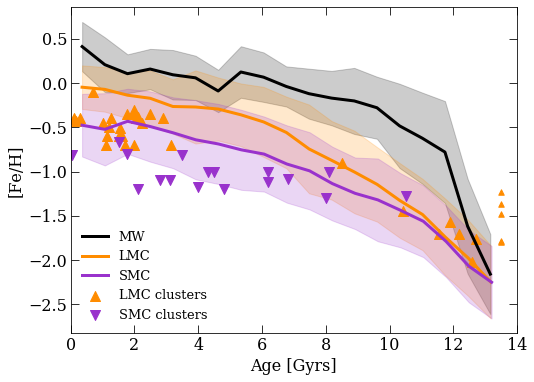

In [17]:
plt.figure(figsize=(8,6))
plt.rc('font',family='serif',size=16)
plt.fill_between(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen-running_sig_amr_mw_cen,running_median_amr_mw_cen+running_sig_amr_mw_cen,alpha=0.2,color='k')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=1, label='MW')
plt.fill_between(bins_lmc_cen-delta_lmc_cen/2,running_median_amr_lmc_cen-running_sig_amr_lmc_cen,running_median_amr_lmc_cen+running_sig_amr_lmc_cen,alpha=0.2,color='darkorange')
plt.plot(bins_lmc_cen-delta_lmc_cen/2,running_median_amr_lmc_cen,'darkorange',lw=3,alpha=1,label='LMC')
plt.fill_between(bins_smc_cen-delta_smc_cen/2,running_median_amr_smc_cen-running_sig_amr_smc_cen,running_median_amr_smc_cen+running_sig_amr_smc_cen,alpha=0.2,color='darkorchid')
plt.plot(bins_smc_cen-delta_smc_cen/2,running_median_amr_smc_cen,'darkorchid',lw=3,alpha=1, label='SMC')
plt.scatter(ages_lmc[ages_lmc<13],fehs_lmc[ages_lmc<13],s=100,marker='^',c='darkorange',label='LMC clusters')
plt.scatter(ages_smc,fehs_smc,s=100,marker='v',c='darkorchid',label='SMC clusters')
plt.scatter(ages_lmc[ages_lmc>13],fehs_lmc[ages_lmc>13],s=30,marker='^',c='darkorange')
# plt.scatter(ages_smc[qflag_smc==0],fehs_smc[qflag_smc==0],s=30,marker='v',c='darkorchid')
plt.xlabel('Age [Gyrs]')
plt.ylabel('[Fe/H]')
plt.legend(loc='lower left',frameon=False,fontsize=13)
plt.xlim(0,14)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8)



# Now load in the satellite LMC and SMC data, and compare the AMR for satellites and centrals (McConnachie+Linear), and for MW

In [18]:
data_lmc_sat = np.loadtxt(path+'LMCs_satellites_mcconnachie_linear.dat', delimiter=" ",skiprows=1)
data_smc_sat = np.loadtxt(path+'SMCs_satellites_mcconnachie_linear.dat', delimiter=" ",skiprows=1)

In [19]:
bins_lmc_sat = np.linspace(data_lmc_sat[:,4].min(),data_lmc_sat[:,4].max(), 20)
delta_lmc_sat = bins_lmc_sat[1]-bins_lmc_sat[0]
idx_lmc_sat  = np.digitize(data_lmc_sat[:,4],bins_lmc_sat)
running_median_amr_lmc_sat = np.array([np.median(data_lmc_sat[:,5][idx_lmc_sat==k]) for k in range(20)])
running_sig_amr_lmc_sat = np.array([np.std(data_lmc_sat[:,5][idx_lmc_sat==k]) for k in range(20)])

bins_smc_sat = np.linspace(data_smc_sat[:,4].min(),data_smc_sat[:,4].max(), 20)
delta_smc_sat = bins_smc_sat[1]-bins_smc_sat[0]
idx_smc_sat  = np.digitize(data_smc_sat[:,4],bins_smc_sat)
running_median_amr_smc_sat = np.array([np.median(data_smc_sat[:,5][idx_smc_sat==k]) for k in range(20)])
running_sig_amr_smc_sat = np.array([np.std(data_smc_sat[:,5][idx_smc_sat==k]) for k in range(20)])


/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Fig 4. Comparison of GC AMR of centrals and satellites

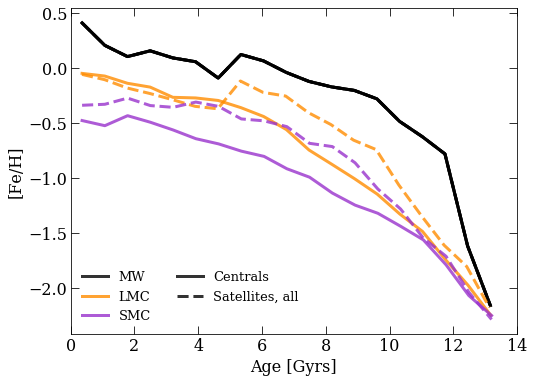

In [20]:
plt.figure(figsize=(8,6))
plt.rc('font',family='serif',size=16)
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label='MW')
plt.plot(bins_lmc_cen-delta_lmc_cen/2,running_median_amr_lmc_cen,'darkorange',lw=3,alpha=.8, label='LMC')
plt.plot(bins_smc_cen-delta_smc_cen/2,running_median_amr_smc_cen,'darkorchid',lw=3,alpha=.8, label='SMC')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label='Centrals')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label='Satellites, all',ls='dashed')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8)
plt.legend(loc='lower left',frameon=False)
plt.plot(bins_lmc_sat-delta_lmc_sat/2,running_median_amr_lmc_sat,'darkorange',ls='dashed',lw=3,alpha=.8)
plt.plot(bins_smc_sat-delta_smc_sat/2,running_median_amr_smc_sat,'darkorchid',ls='dashed',lw=3,alpha=.8)
plt.xlabel('Age [Gyrs]')
plt.ylabel('[Fe/H]')
plt.legend(loc='lower left',frameon=False,ncol=2,fontsize=13)
plt.xlim(0,14)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8)



# Repeat Fig 4, but now truncating the time in which GCs form in satellite LMC and SMC galaxies

Plot for a truncation at T_trunc > 4.5 Gyr and for T_trunc < 1 Gyr

First we need to find the group numbers and subgroup numbers which satisfy the cut in age we are making, so we don't mask out all GCs below a given age associated to a given subhalo for LMCs, for t_trunc > 4.5 Gyr and t_trunc > 1 Gyr

In [21]:
# this has the  GCs mass above 5e4
# LMC
GroupNum_unique_lmc_sat = np.unique(data_lmc_sat[:,0])  #gives you a list of all possible Group Numbers
age_trunc_lmc_sat=[]
met_trunc_lmc_sat=[]
mass_trunc_lmc_sat=[]
for i in range(len(GroupNum_unique_lmc_sat)):  #loops over all possible group numbers
    mask = data_lmc_sat[:,0] == GroupNum_unique_lmc_sat[i]  #picks out the clusters with that group number
    Group_SubGroupNum_lmc_sat = np.unique(data_lmc_sat[:,1][mask]) #gives a list of the subgroup numbers within that group
    for j in range(len(Group_SubGroupNum_lmc_sat)): # loops over possible sub group numbers within that group
        mask = (data_lmc_sat[:,0] == GroupNum_unique_lmc_sat[i])*(data_lmc_sat[:,1] == Group_SubGroupNum_lmc_sat[j]) #picks out clusters within this group and subgroup
        age_masked_lmc_sat = data_lmc_sat[:,4][mask] #gives you the ages of the GCs in that galaxy
        met_masked_lmc_sat = data_lmc_sat[:,5][mask] #gives you fehs of the GCs in that galaxy
        mass_masked_lmc_sat = data_lmc_sat[:,3][mask] #gives you mass of the GCs in that galaxy
        min_age = np.min(age_masked_lmc_sat)
        if min_age > 4.5 and mass_masked_lmc_sat[j]>5e4: 
            age_trunc_lmc_sat.extend(age_masked_lmc_sat)
            met_trunc_lmc_sat.extend(met_masked_lmc_sat)
            mass_trunc_lmc_sat.extend(mass_masked_lmc_sat)
        else: continue
# SMC
GroupNum_unique_smc_sat = np.unique(data_smc_sat[:,0])  #gives you a list of all possible Group Numbers
age_trunc_smc_sat=[]
met_trunc_smc_sat=[]
mass_trunc_smc_sat=[]
for i in range(len(GroupNum_unique_smc_sat)):  #loops over all possible group numbers
    mask = data_smc_sat[:,0] == GroupNum_unique_smc_sat[i]  #picks out the clusters with that group number
    Group_SubGroupNum_smc_sat = np.unique(data_smc_sat[:,1][mask]) #gives a list of the subgroup numbers within that group
    for j in range(len(Group_SubGroupNum_smc_sat)): # loops over possible sub group numbers within that group
        mask = (data_smc_sat[:,0] == GroupNum_unique_smc_sat[i])*(data_smc_sat[:,1] == Group_SubGroupNum_smc_sat[j]) #picks out clusters within this group and subgroup
        age_masked_smc_sat = data_smc_sat[:,4][mask] #gives you the ages of the GCs in that galaxy
        met_masked_smc_sat = data_smc_sat[:,5][mask] #gives you fehs of the GCs in that galaxy
        mass_masked_smc_sat = data_smc_sat[:,3][mask] #gives you mass of the GCs in that galaxy
        min_age = np.min(age_masked_smc_sat)
        if min_age > 4.5 and mass_masked_smc_sat[j]>5e4: 
            age_trunc_smc_sat.extend(age_masked_smc_sat)
            met_trunc_smc_sat.extend(met_masked_smc_sat)
            mass_trunc_smc_sat.extend(met_masked_smc_sat)
        else: continue
            
            

repeat the procedure for SMC galaxies

In [22]:
# LMC
GroupNum_unique_lmc_sat = np.unique(data_lmc_sat[:,0])  #gives you a list of all possible Group Numbers
age_trunc_lmc_sat2=[]
met_trunc_lmc_sat2=[]
mass_trunc_lmc_sat2=[]
for i in range(len(GroupNum_unique_lmc_sat)):  #loops over all possible group numbers
    mask = data_lmc_sat[:,0] == GroupNum_unique_lmc_sat[i]  #picks out the clusters with that group number
    Group_SubGroupNum_lmc_sat = np.unique(data_lmc_sat[:,1][mask]) #gives a list of the subgroup numbers within that group
    for j in range(len(Group_SubGroupNum_lmc_sat)): # loops over possible sub group numbers within that group
        mask = (data_lmc_sat[:,0] == GroupNum_unique_lmc_sat[i])*(data_lmc_sat[:,1] == Group_SubGroupNum_lmc_sat[j]) #picks out clusters within this group and subgroup
        age_masked_lmc_sat2 = data_lmc_sat[:,4][mask] #gives you the ages of the GCs in that galaxy
        met_masked_lmc_sat2 = data_lmc_sat[:,5][mask] #gives you fehs of the GCs in that galaxy
        mass_masked_lmc_sat2 = data_lmc_sat[:,3][mask] #gives you mass of the GCs in that galaxy
        min_age = np.min(age_masked_lmc_sat2)
        if min_age < 1 and mass_masked_lmc_sat[j]>5e4:  #check if the minimum age satisfies some criteria, if it doesn't then move on
            age_trunc_lmc_sat2.extend(age_masked_lmc_sat2)
            met_trunc_lmc_sat2.extend(met_masked_lmc_sat2)
            mass_trunc_lmc_sat2.extend(mass_masked_lmc_sat2)
        else: continue #if it does then append some lists
# SMC       
GroupNum_unique_smc_sat = np.unique(data_smc_sat[:,0])  #gives you a list of all possible Group Numbers
age_trunc_smc_sat2=[]
met_trunc_smc_sat2=[]
mass_trunc_smc_sat2=[]
for i in range(len(GroupNum_unique_smc_sat)):  #loops over all possible group numbers
    mask = data_smc_sat[:,0] == GroupNum_unique_smc_sat[i]  #picks out the clusters with that group number
    Group_SubGroupNum_smc_sat = np.unique(data_smc_sat[:,1][mask]) #gives a list of the subgroup numbers within that group
    for j in range(len(Group_SubGroupNum_smc_sat)): # loops over possible sub group numbers within that group
        mask = (data_smc_sat[:,0] == GroupNum_unique_smc_sat[i])*(data_smc_sat[:,1] == Group_SubGroupNum_smc_sat[j]) #picks out clusters within this group and subgroup
        age_masked_smc_sat2 = data_smc_sat[:,4][mask] #gives you the ages of the GCs in that galaxy
        met_masked_smc_sat2 = data_smc_sat[:,5][mask] #gives you fehs of the GCs in that galaxy
        mass_masked_smc_sat2 = data_smc_sat[:,3][mask] #gives you mass of the GCs in that galaxy
        min_age = np.min(age_masked_smc_sat2)
        if min_age < 1 and mass_masked_smc_sat2[j]>5e4: #check if the minimum age satisfies some criteria, if it doesn't then move on
            age_trunc_smc_sat2.extend(age_masked_smc_sat2)
            met_trunc_smc_sat2.extend(met_masked_smc_sat2)
            mass_trunc_smc_sat2.extend(mass_masked_smc_sat2)
        else: continue#if it does then append some lists

            
            

Look at the median and sigma values of the Ages of GCs (with masses > 5e4) in the non-truncated LMC/SMC mass galaxies. Do they match the LMC/SMC?

In [23]:
mass_trunc_lmc_sat2 = np.array(mass_trunc_lmc_sat2)
age_trunc_lmc_sat2 = np.array(age_trunc_lmc_sat2)

mass_trunc_smc_sat2 = np.array(mass_trunc_smc_sat2)
age_trunc_smc_sat2 = np.array(age_trunc_smc_sat2)

In [24]:
# Centrals
print('LMC Centrals')
print((np.mean(data_lmc_cen[:,4][data_lmc_cen[:,3]>5e4])))
print((np.std(data_lmc_cen[:,4][data_lmc_cen[:,3]>5e4])))
print('SMC Centrals')
print((np.mean(data_smc_cen[:,4][data_smc_cen[:,3]>5e4])))
print((np.std(data_smc_cen[:,4][data_smc_cen[:,3]>5e4])))

# Non-truncated satellites
print('LMC Satellites')
print((np.mean(age_trunc_lmc_sat2[mass_trunc_lmc_sat2>5e4])))
print((np.std(age_trunc_lmc_sat2[mass_trunc_lmc_sat2>5e4])))
print('SMC Satellties')
print((np.mean(age_trunc_smc_sat2[mass_trunc_smc_sat2>5e4])))
print((np.std(age_trunc_smc_sat2[mass_trunc_smc_sat2>5e4])))

LMC Centrals
7.120444315904795
3.879503956593625
SMC Centrals
8.619126484579066
3.8197717957415613
LMC Satellites
5.871795750788679
3.379540391484788
SMC Satellties
9.283318683532432
3.650939264233313


Now get the median AMR values

In [25]:
# LMC
bins_lmc_sat_4half = np.linspace(np.array(age_trunc_lmc_sat).min(),np.array(age_trunc_lmc_sat).max(), 10)
delta_lmc_sat_4half = bins_lmc_sat_4half[1]-bins_lmc_sat_4half[0]
idx_lmc_sat_4half  = np.digitize(np.array(age_trunc_lmc_sat),bins_lmc_sat_4half)
running_median_amr_lmc_sat_4half = np.array([np.median(np.array(met_trunc_lmc_sat)[idx_lmc_sat_4half==k]) for k in range(10)])
running_sig_amr_lmc_sat_4half = np.array([np.std(np.array(met_trunc_lmc_sat)[idx_lmc_sat_4half==k]) for k in range(10)])

bins_lmc_sat_1 = np.linspace(np.array(age_trunc_lmc_sat2).min(),np.array(age_trunc_lmc_sat2).max(), 10)
delta_lmc_sat_1 = bins_lmc_sat_1[1]-bins_lmc_sat_1[0]
idx_lmc_sat_1  = np.digitize(np.array(age_trunc_lmc_sat2),bins_lmc_sat_1)
running_median_amr_lmc_sat_1 = np.array([np.median(np.array(met_trunc_lmc_sat2)[idx_lmc_sat_1==k]) for k in range(10)])
running_sig_amr_lmc_sat_1 = np.array([np.std(np.array(met_trunc_lmc_sat2)[idx_lmc_sat_1==k]) for k in range(10)])

# SMC
bins_smc_sat_4half = np.linspace(np.array(age_trunc_smc_sat).min(),np.array(age_trunc_smc_sat).max(), 10)
delta_smc_sat_4half = bins_smc_sat_4half[1]-bins_smc_sat_4half[0]
idx_smc_sat_4half  = np.digitize(np.array(age_trunc_smc_sat),bins_smc_sat_4half)
running_median_amr_smc_sat_4half = np.array([np.median(np.array(met_trunc_smc_sat)[idx_smc_sat_4half==k]) for k in range(10)])
running_sig_amr_smc_sat_4half = np.array([np.std(np.array(met_trunc_smc_sat)[idx_smc_sat_4half==k]) for k in range(10)])

bins_smc_sat_1 = np.linspace(np.array(age_trunc_smc_sat2).min(),np.array(age_trunc_smc_sat2).max(), 10)
delta_smc_sat_1 = bins_smc_sat_1[1]-bins_smc_sat_1[0]
idx_smc_sat_1  = np.digitize(np.array(age_trunc_smc_sat2),bins_smc_sat_1)
running_median_amr_smc_sat_1 = np.array([np.median(np.array(met_trunc_smc_sat2)[idx_smc_sat_1==k]) for k in range(10)])
running_sig_amr_smc_sat_1 = np.array([np.std(np.array(met_trunc_smc_sat2)[idx_smc_sat_1==k]) for k in range(10)])


/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/danny/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Fig 5. Comparison of GC AMR for LMC/SMC-mass galaxies with different GC quenching times

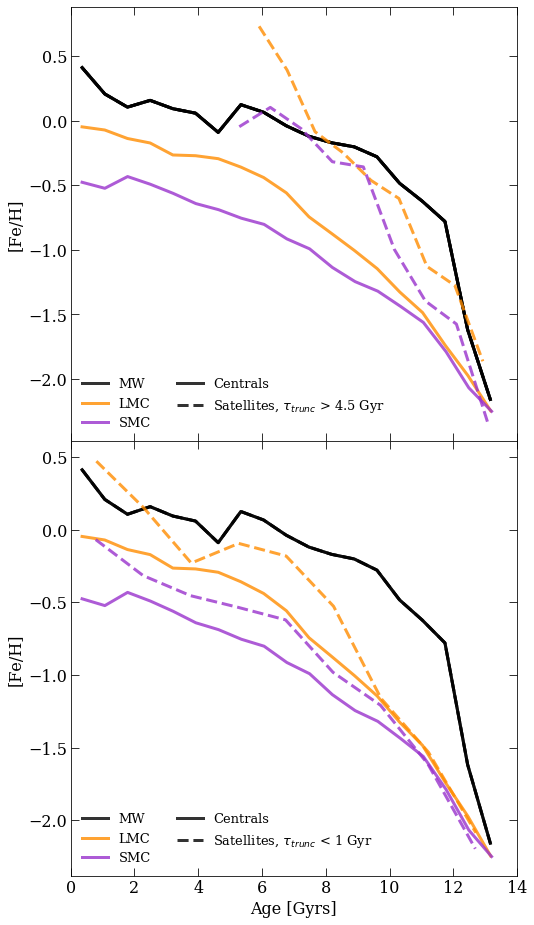

In [27]:
plt.figure(figsize=(8,16))
plt.subplot(2,1,1)
plt.rc('font',family='serif',size=16)
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label='MW')
plt.plot(bins_lmc_cen-delta_lmc_cen/2,running_median_amr_lmc_cen,'darkorange',lw=3,alpha=.8, label='LMC')
plt.plot(bins_smc_cen-delta_smc_cen/2,running_median_amr_smc_cen,'darkorchid',lw=3,alpha=.8, label='SMC')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label='Centrals')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label=r'Satellites, $\tau_{trunc}$ > 4.5 Gyr',ls='dashed')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8)
plt.legend(loc='lower left',frameon=False)
plt.plot(bins_lmc_sat_4half-delta_lmc_sat_4half/2,running_median_amr_lmc_sat_4half,'darkorange',ls='dashed',lw=3,alpha=.8)
plt.plot(bins_smc_sat_4half-delta_smc_sat_4half/2,running_median_amr_smc_sat_4half,'darkorchid',ls='dashed',lw=3,alpha=.8)
# plt.xlabel('Age [Gyrs]')
plt.ylabel('[Fe/H]')
plt.legend(loc='lower left',frameon=False,ncol=2,fontsize=13)
plt.xlim(0,14)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8,labelbottom=False)

plt.subplot(2,1,2)
plt.rc('font',family='serif',size=16)
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label='MW')
plt.plot(bins_lmc_cen-delta_lmc_cen/2,running_median_amr_lmc_cen,'darkorange',lw=3,alpha=.8, label='LMC')
plt.plot(bins_smc_cen-delta_smc_cen/2,running_median_amr_smc_cen,'darkorchid',lw=3,alpha=.8, label='SMC')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label='Centrals')
plt.plot(bins_mw_cen-delta_mw_cen/2,running_median_amr_mw_cen,'k',lw=3,alpha=.8, label=r'Satellites, $\tau_{trunc}$ < 1 Gyr',ls='dashed')
plt.legend(loc='lower left',frameon=False)
plt.plot(bins_lmc_sat_1-delta_lmc_sat_1/2,running_median_amr_lmc_sat_1,'darkorange',ls='dashed',lw=3,alpha=.8)
plt.plot(bins_smc_sat_1-delta_smc_sat_1/2,running_median_amr_smc_sat_1,'darkorchid',ls='dashed',lw=3,alpha=.8)
plt.xlabel('Age [Gyrs]')
plt.ylabel('[Fe/H]')
plt.legend(loc='lower left',frameon=False,ncol=2,fontsize=13)
plt.xlim(0,14)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8)

plt.subplots_adjust(hspace=0.,wspace=0.3)


# Check the SFH of the LMC and SMC analogues, and compare it to observational data of Weisz et al 2013

In [37]:
# LOAD THE OBSERVATIONAL DATA
# LMC
path_lmc_sfh = '/Users/danny/Desktop/AMR-MCs/data/lmc_sfh_weisz2013.fits'
tb_lmc_sfh = fits.open(path_lmc_sfh)
data_lmc_sfh = tb_lmc_sfh[1].data 

log_time_young_bin_lmc = data_lmc_sfh.field('log_lookback_time_youngest_binedge')
log_time_old_bin_lmc = data_lmc_sfh.field('log_lookback_time_oldest_binedge')
cumulative_sfh_lmc = data_lmc_sfh.field('cum_sfh')
high_err_sfh_lmc = data_lmc_sfh.field('upper_err_cum_sfh')
low_err_sfh_lmc = data_lmc_sfh.field('lower_err_cum_sfh')
# avg_log_time_lmc = (log_time_old_bin_lmc+log_time_young_bin_lmc)/2
avg_log_time_lmc = log_time_young_bin_lmc

# LOAD THE DATA
# SMC
path_smc_sfh = '/Users/danny/Desktop/AMR-MCs/data/smc_sfh_weisz2013.fits'
tb_smc_sfh = fits.open(path_smc_sfh)
data_smc_sfh = tb_smc_sfh[1].data 

log_time_young_bin_smc = data_smc_sfh.field('log_lookback_time_youngest_binedge')
log_time_old_bin_smc = data_smc_sfh.field('log_lookback_time_oldest_binedge')
cumulative_sfh_smc = data_smc_sfh.field('cum_sfh')
high_err_sfh_smc = data_smc_sfh.field('upper_err_cum_sfh')
low_err_sfh_smc = data_smc_sfh.field('lower_err_cum_sfh')
# avg_log_time_smc = (log_time_old_bin_smc+log_time_young_bin_smc)/2
avg_log_time_smc = log_time_young_bin_smc


In [38]:
# in order to get the observational data to cover the same range of ages as the sims, need to add the first point at 14 Gyr
avg_log_time_lmc = np.append(avg_log_time_lmc,10.14)
avg_log_time_smc = np.append(avg_log_time_smc,10.14)
# where the SFH is 0
cumulative_sfh_lmc = np.append(cumulative_sfh_lmc,0)
cumulative_sfh_smc = np.append(cumulative_sfh_smc,0)
# and for the high and low errors
high_err_sfh_lmc = np.append(high_err_sfh_lmc,0)
high_err_sfh_smc = np.append(high_err_sfh_smc,0)
low_err_sfh_lmc = np.append(low_err_sfh_lmc,0)
low_err_sfh_smc = np.append(low_err_sfh_smc,0)


In [39]:
# unlog ages
avg_time_lmc = (10**avg_log_time_lmc)/1e9
avg_time_smc = (10**avg_log_time_smc)/1e9


Now we need to scale the observational ages so they match the sim ones. We do this by dividing the obs by the max lookback time value and then timing it by the age at which EAGLE starts to form stars

In [40]:
scaled_log_time_lmc = (avg_time_lmc/np.max(avg_time_lmc))*13.5
scaled_log_time_smc = (avg_time_smc/np.max(avg_time_smc))*13.5


In [41]:
# LOAD THE THEORETICAL DATA
# LMC

cum_mass_lmc_cen = np.load('/Users/danny/Desktop/AMR-MCs/data/new_sims_initial_mass/CumulativeMass_LMC_init.npy')

# LOAD THE DATA
# SMC

cum_mass_smc_cen = np.load('/Users/danny/Desktop/AMR-MCs/data/new_sims_initial_mass/CumulativeMass_SMC_init.npy')


In [42]:
# get the percentiles of the simulated galaxies
percen_cum_mass_lmc_cen = np.percentile(cum_mass_lmc_cen,[16,50,84],axis=0)
percen_cum_mass_smc_cen = np.percentile(cum_mass_smc_cen,[16,50,84],axis=0)

# normalise the cumulative SFH. Remember to also flip it to get the x axis to be lookback time and not age!
percen_cum_mass_lmc_cen_median =  np.flip(percen_cum_mass_lmc_cen[1,:]/percen_cum_mass_lmc_cen[1,0])
percen_cum_mass_smc_cen_median =  np.flip(percen_cum_mass_smc_cen[1,:]/percen_cum_mass_smc_cen[1,0])

percen_cum_mass_lmc_cen_84 =  np.flip(percen_cum_mass_lmc_cen[2,:]/percen_cum_mass_lmc_cen[1,0])
percen_cum_mass_smc_cen_84 =  np.flip(percen_cum_mass_smc_cen[2,:]/percen_cum_mass_smc_cen[1,0])

percen_cum_mass_lmc_cen_16 =  np.flip(percen_cum_mass_lmc_cen[0,:]/percen_cum_mass_lmc_cen[1,0])
percen_cum_mass_smc_cen_16 =  np.flip(percen_cum_mass_smc_cen[0,:]/percen_cum_mass_smc_cen[1,0])


# Fig 6. Comparison of SFH of LMC/SMC-mass galaxies in E-MOSAICS and that from observations of the LMC/SMC

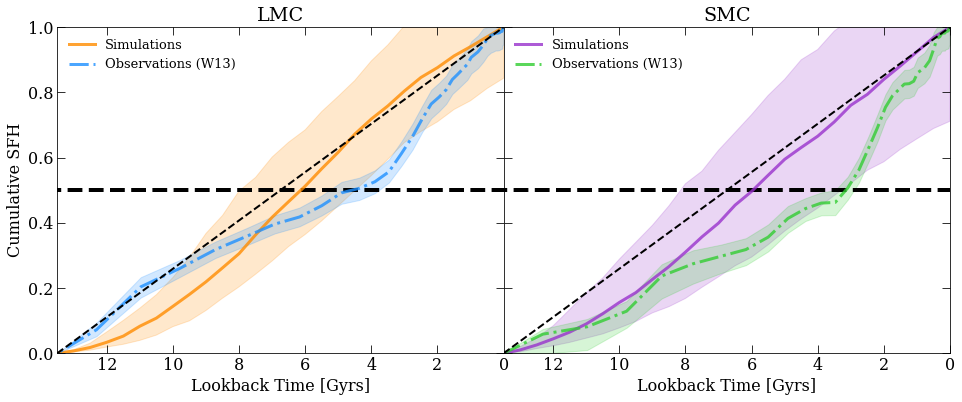

In [43]:
plt.figure(figsize=(16,6))
plt.rc('font',family='serif',size=16)

plt.subplot(1,2,1)
plt.title('LMC')

xs = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14]
plt.plot(np.flip(xs),percen_cum_mass_lmc_cen_median,lw=3,alpha=.8, label=r'Simulations',c='darkorange')
plt.fill_between(np.flip(xs),percen_cum_mass_lmc_cen_16,percen_cum_mass_lmc_cen_84,alpha=0.2,color='darkorange')
plt.plot(scaled_log_time_lmc,cumulative_sfh_lmc,lw=3,alpha=.8, label=r'Observations (W13)',c='dodgerblue',linestyle='-.')
plt.fill_between(scaled_log_time_lmc,cumulative_sfh_lmc-low_err_sfh_lmc,cumulative_sfh_lmc+high_err_sfh_lmc,alpha=0.2,color='dodgerblue')

plt.plot((13.5,0),(0,1),linestyle='dashed',linewidth=2,color='k')
plt.legend(loc='lower left',frameon=False)
plt.xlabel('Lookback Time [Gyrs]')
plt.ylabel('Cumulative SFH')
plt.hlines(0.5,-2,15,linestyle='dashed',color='k',linewidth=4)
plt.legend(loc='upper left',frameon=False,fontsize=13)
plt.xlim(13.5,0)
plt.ylim(0,1)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8)


plt.subplot(1,2,2)
plt.title('SMC')
plt.plot(np.flip(xs),percen_cum_mass_smc_cen_median,lw=3,alpha=.8, label=r'Simulations',c='darkorchid')
plt.fill_between(np.flip(xs),percen_cum_mass_smc_cen_16,percen_cum_mass_smc_cen_84,alpha=0.2,color='darkorchid')
plt.plot(scaled_log_time_smc,cumulative_sfh_smc,lw=3,alpha=.8, label=r'Observations (W13)',c='limegreen',linestyle='-.')
plt.fill_between(scaled_log_time_smc,cumulative_sfh_smc-low_err_sfh_smc,cumulative_sfh_smc+high_err_sfh_smc,alpha=0.2,color='limegreen')


plt.plot((13.5,0),(0,1),linestyle='dashed',linewidth=2,color='k')
plt.legend(loc='lower left',frameon=False)
plt.xlabel('Lookback Time [Gyrs]')
# plt.ylabel('Cumulative SFH')
plt.hlines(0.5,-2,15,linestyle='dashed',color='k',linewidth=4)
plt.legend(loc='upper left',frameon=False,fontsize=13)
plt.xlim(13.5,0)
plt.ylim(0,1)
plt.tick_params(direction='in',axis='both',right=True,top=True,length=8,labelleft=False)

plt.subplots_adjust(hspace=0.15,wspace=0.)


# Now let's look for LMC/SMC analogues

Try and find a perfect LMC/SMC analogue. First check to see the full SMC/LMC like galaxies

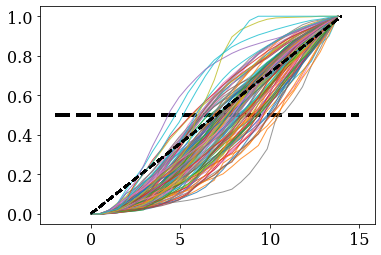

In [44]:
# CumulativeMass, MedianMet, StdMet

# LMC
for indx,i in enumerate(cum_mass_lmc_cen):
#     plt.figure(figsize=(8,6))
#     plt.title('LMC analogue number '+str(indx))
    xs = np.linspace(0,13.8,len(percen_cum_mass_lmc_cen_median))
    ys = i/np.max(i)
    plt.plot(np.flip(xs),ys,lw=1,alpha=.8)
    plt.plot((0,14),(0,1),linestyle='dashed',linewidth=2,color='k')
    plt.hlines(0.5,-2,15,linestyle='dashed',color='k',linewidth=4)


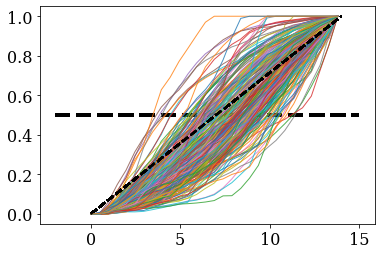

In [45]:
# CumulativeMass, MedianMet, StdMet

# SMC
for indx,i in enumerate(cum_mass_smc_cen):
#     plt.figure(figsize=(8,6))
#     plt.title('SMC analogue number '+str(indx))
    xs = np.linspace(0,13.8,len(percen_cum_mass_smc_cen_median))
    ys = i/np.max(i)
    plt.plot(np.flip(xs),ys,lw=1,alpha=.8)
    plt.plot((0,14),(0,1),linestyle='dashed',linewidth=2,color='k')
    plt.hlines(0.5,-2,15,linestyle='dashed',color='k',linewidth=4)

# Loop through all the LMC analogues (centrals+satellites) and compute a KS test between the observed (W13) and simulated (EAGLE) distributions

In [46]:
# load in the satellite LMC data
# LMC
cum_mass_lmc_sat = np.load('/Users/danny/Desktop/AMR-MCs/data/new_sims_initial_mass/CumulativeMass_LMC_satellites_init.npy')
# add the satellite data to the central data
cum_mass_lmc_tot = np.vstack((cum_mass_lmc_cen,cum_mass_lmc_sat))

In [47]:
# get the percentiles of the simulated galaxies
percen_cum_mass_lmc_tot = np.percentile(cum_mass_lmc_tot,[16,50,84],axis=0)

# normalise the cumulative SFH. Remember to also flip it to get the x axis to be lookback time and not age!
percen_cum_mass_lmc_tot_median =  np.flip(percen_cum_mass_lmc_tot[1,:]/percen_cum_mass_lmc_tot[1,0])

percen_cum_mass_lmc_tot_84 =  np.flip(percen_cum_mass_lmc_tot[2,:]/percen_cum_mass_lmc_tot[1,0])

percen_cum_mass_lmc_tot_16 =  np.flip(percen_cum_mass_lmc_tot[0,:]/percen_cum_mass_lmc_tot[1,0])


# Loop through all of the LMC galaxies in the simulations, and compare the SFH to the Weiz et al 2013 SFH performing a chi2 test. Before those results, we show the comparison by employing a KS test and a Kuiper test (no nos gusta)

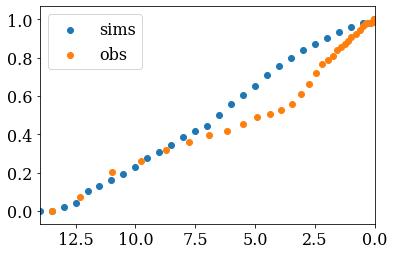

In [49]:
xs = np.linspace(0,14,29)
obvs_ages= scaled_log_time_lmc
plt.scatter(xs,cum_mass_lmc_tot[0]/np.max(cum_mass_lmc_tot[0]),label='sims')
plt.scatter(obvs_ages,cumulative_sfh_lmc,label='obs')
plt.xlim(14,0)
plt.legend(loc='upper left')

here the sims age values are logarithmically scaled, thus we need to interpolate to find the corresponding y_obs value for a given x_sim value

In [50]:
xs_sims = np.linspace(0,14,29)
ys_sims = cum_mass_lmc_tot[0]/np.max(cum_mass_lmc_tot[0])
ys_obs = np.interp(xs_sims,obvs_ages,cumulative_sfh_lmc)


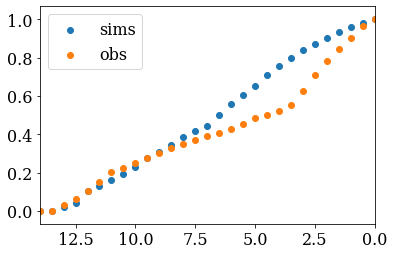

In [51]:
xs = np.linspace(0,14,29)
obvs_ages= scaled_log_time_lmc
plt.scatter(xs,cum_mass_lmc_tot[0]/np.max(cum_mass_lmc_tot[0]),label='sims')
plt.scatter(xs_sims,ys_obs,label='obs')
plt.xlim(14,0)
plt.legend(loc='upper left')

Now we see that for every x value, we have a sim and obs value 

# Perform a Pearson's chi2 test

In [52]:
# Load in the new LMC/SMC E-MOSAICS data table
path= '/Users/danny/Desktop/AMR-MCs/data/'
# load the data for the LMC and SMC centrals
data_lmc_cen = np.loadtxt(path+'LMCs_centrals_mcconnachie_linear_new.dat', delimiter=" ",skiprows=1)
data_smc_cen = np.loadtxt(path+'SMCs_centrals_mcconnachie_linear_new.dat', delimiter=" ",skiprows=1)
# load the data for the LMC and SMC satellites
data_lmc_sat = np.loadtxt(path+'LMCs_satellites_mcconnachie_linear_new.dat', delimiter=" ",skiprows=1)
data_smc_sat = np.loadtxt(path+'SMCs_satellites_mcconnachie_linear_new.dat', delimiter=" ",skiprows=1)


# LMC

In [67]:
from scipy import stats
from numpy import inf
chi2values_lmc_tot = np.zeros(len(cum_mass_lmc_tot))

for indx, i in enumerate(cum_mass_lmc_tot):
#     plt.figure(figsize=(8,6))
#     plt.title('LMC analogue number '+str(indx))
    xs_sims = np.linspace(0,14,29)
    obs_ages_lmc= scaled_log_time_lmc
    ys_sims = i/np.max(i)
    ys_obs = np.interp(xs_sims,obs_ages_lmc,cumulative_sfh_lmc)
# because the ys_sims goes to 0 we are dividing by a very small number.  this is what is dominating the chi^2
# To get around this, do the chi^2 on ys_sims+1 and ys_obs+1
    ys_sims2 = ys_sims+1
    ys_obs2 = ys_obs+1
#     compute pearson's chi2 with k-1 degrees of freedom
    res = ((ys_obs2-ys_sims2)**2)/ys_sims2
#     res[res==inf]=0
    chi2 = np.sum(res[2:])    
#     plt.plot(xs_sims,ys_sims,alpha=.8,lw=3,c='darkorange')
#     plt.plot(xs_sims,ys_obs,lw=3,alpha=.8,c='dodgerblue',linestyle='-.')
# #     plt.plot((13.8,0),(0,1),linestyle='dashed',linewidth=2,color='k')
# #     plt.hlines(0.5,13.8,-0.2,linestyle='dashed',color='k',linewidth=4)
#     plt.text(13,0.9,'Chi2: '+str(chi2))
#     plt.xlim(14,0)
    chi2values_lmc_tot[indx]=chi2

Text(0.5, 0, 'Chi2 Value')

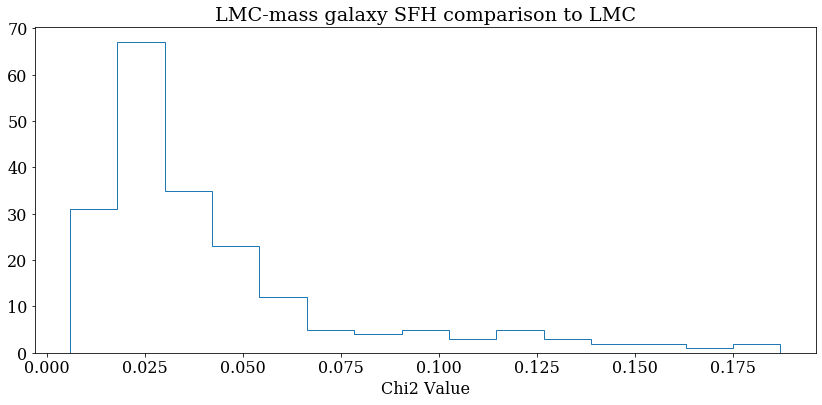

In [68]:
plt.figure(figsize=(14,6))
plt.title('LMC-mass galaxy SFH comparison to LMC')
plt.hist(chi2values_lmc_tot/9,15,histtype='step')
plt.xlabel('Chi2 Value')

In [55]:
# find the lowest 10 Chi2 values
sorted_chi2_lmc = np.sort(chi2values_lmc_tot)
first10_chi2_lmc = sorted_chi2_lmc[:10]
# create a mask for the best 10 chi2 fits
mask_goodchi2_lmc = np.isin(chi2values_lmc_tot,first10_chi2_lmc)
print(chi2values_lmc_tot[mask_goodchi2_lmc])

data_lmc_tot = np.vstack((data_lmc_cen,data_lmc_sat))
print(np.unique(data_lmc_tot[:,0])[mask_goodchi2_lmc])


[0.11724903 0.11793107 0.08879501 0.11567352 0.11820529 0.11160765
 0.11208259 0.07187261 0.11570529 0.05262809]
[  7.  19.  26.  49.  51.  68. 131. 158. 191. 192.]


# Load in the present day masses of the LMC/SMC galaxies and compare the cumulative distributions with the initial masses (plotted already)

In [56]:
cum_mass_lmc_cen_present = np.load('/Users/danny/Desktop/AMR-MCs/data/CumulativeMass_LMC.npy')
cum_mass_lmc_sat_present = np.load('/Users/danny/Desktop/AMR-MCs/data/CumulativeMass_LMC_satellites.npy')
# add the satellite data to the central data
cum_mass_lmc_tot_present = np.vstack((cum_mass_lmc_cen_present,cum_mass_lmc_sat_present))

# Fig 7 & 8. Comparison of SFHs of the 10 closest LMC/SMC-mass galaxy analogues from E-MOSAICS with observational results

/Users/danny/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


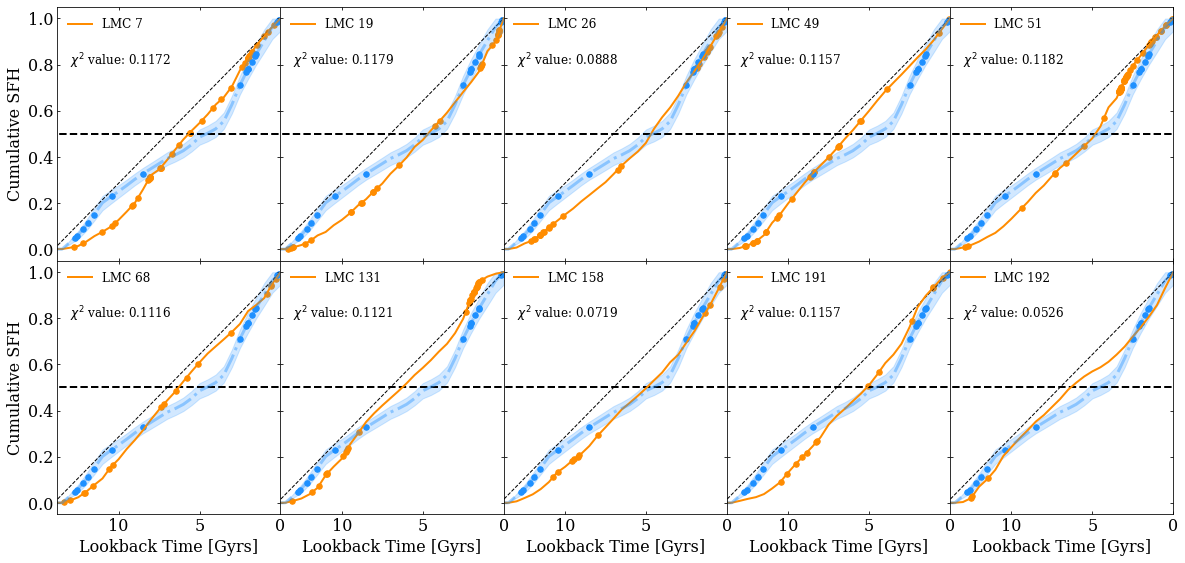

In [57]:
import matplotlib.gridspec as grid

fig = plt.figure(constrained_layout=True,figsize=(20,14))
gs = grid.GridSpec(3,5)
p = 0

# get all the analogues with p-value>0.6
lmc_analogues2 = np.unique(data_lmc_tot[:,0])[mask_goodchi2_lmc]

# loop through the analogues, find their respective GCs and plot
for indx,i in enumerate(lmc_analogues2):  
#     get the ages for the GCs associated to each galaxy which have Mstar > 5x10^4 Msun
    unique_ids = np.unique(data_lmc_tot[:,0])
    indx_unique = np.linspace(0,len(unique_ids)-1,len(unique_ids))
    mask = i == indx_unique
    unique_ids = unique_ids[mask]
    mask_unique = data_lmc_tot[:,0]==unique_ids
    masses = data_lmc_tot[:,4][mask_unique]
    ages = data_lmc_tot[:,5][mask_unique][masses>5e4]
    
    ax = fig.add_subplot(gs[p])
    ax.hlines(0.5,15,-1,linestyle='dashed',color='k',linewidth=2)
    ax.plot((14,0),(0,1),linestyle='dashed',linewidth=1,color='k')
    xs_sims = np.linspace(0,14,29)
    good_cum_mass_lmc_tot = cum_mass_lmc_tot[mask_goodchi2_lmc]
    good_cum_mass_lmc_tot_present = cum_mass_lmc_tot_present[mask_goodchi2_lmc]
    
    obs_ages = scaled_log_time_lmc
    ys_sims = good_cum_mass_lmc_tot[indx]/np.max(good_cum_mass_lmc_tot[indx])
    ys_sims_present = good_cum_mass_lmc_tot_present[indx]/np.max(good_cum_mass_lmc_tot_present[indx])
    ys_obs = np.interp(xs_sims,obs_ages,cumulative_sfh_lmc)
    ys_obs_high = np.interp(xs_sims,obs_ages,cumulative_sfh_lmc+high_err_sfh_lmc)
    ys_obs_low = np.interp(xs_sims,obs_ages,cumulative_sfh_lmc-low_err_sfh_lmc)
    ys_gcs = np.interp(ages,xs_sims,ys_sims)
    ys_gcs_present = np.interp(ages,xs_sims,ys_sims_present)    

    ax.plot(xs_sims,ys_sims,lw=2,c='darkorange',alpha=1,label='LMC '+str(int(i)))
#     ax.plot(xs_sims,ys_sims_present,lw=2,c='k',alpha=1,ls='dashed')
    ax.scatter(ages,ys_gcs,s=30,c='darkorange',marker='o')
    plt.legend(loc='upper left',fontsize=12,frameon=False)
    
    ys_gcs_obs = np.interp(ages_lmc[qflag_lmc==1],xs_sims,ys_obs) # here the xs must be in increasing order
    plt.plot(xs_sims,ys_obs,lw=3,alpha=.4, label=r'Observations (W13)',c='dodgerblue',ls='-.')
    plt.fill_between(xs_sims,ys_obs_low,ys_obs_high,alpha=0.2,color='dodgerblue')
    plt.text(13,0.8,r'$\chi^{2}$ value: '+str("%.4f" % chi2values_lmc_tot[mask_goodchi2_lmc][indx]),fontsize=12)
    ax.scatter(ages_lmc[qflag_lmc==1],ys_gcs_obs,s=30,c='dodgerblue',marker='o')
    ax.set_ylim(-0.05,1.05)
    ax.set_xlim(13.8,0)
    p+=1
axis = fig.axes

axis[0].set(ylabel='Cumulative SFH')
axis[5].set(ylabel='Cumulative SFH')
# axis[9].set(ylabel='Cumulative SFH')
axis[0].tick_params(direction='in',axis='both',length=3,right=True,top=True,labelbottom=False)
axis[1].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
axis[2].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
axis[3].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
axis[4].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
# axis[5].tick_params(direction='in',axis='both',length=3,labelbottom=False,right=True,top=True)
# axis[6].tick_params(direction='in',axis='both',length=3,labelleft=False,labelbottom=False,right=True,top=True)
# axis[7].tick_params(direction='in',axis='both',length=3,labelleft=False,labelbottom=False,right=True,top=True)
# axis[8].tick_params(direction='in',axis='both',length=3,right=True,labelbottom=False,labelleft=False,top=True)
# axis[9].tick_params(direction='in',axis='both',length=3,labelleft=False,labelbottom=False,right=True,top=True)
axis[5].tick_params(direction='in',axis='both',length=3,right=True,top=True)
axis[6].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)
axis[7].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)
axis[8].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)
axis[9].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)


axis[5].set(xlabel='Lookback Time [Gyrs]')
axis[6].set(xlabel='Lookback Time [Gyrs]')
axis[7].set(xlabel='Lookback Time [Gyrs]')
axis[8].set(xlabel='Lookback Time [Gyrs]')
axis[9].set(xlabel='Lookback Time [Gyrs]')

axis[8].tick_params(direction='in',axis='both',length=3,right=True,top=True)
axis[3].tick_params(direction='in',axis='both',length=3,right=True,top=True)


gs.update(wspace=0.,hspace=0.)

# plt.savefig('/Users/danny/Desktop/AMR-MCs/plots/LMC_analogues_SFH_chi2_best10_init_scaledage.pdf', format='pdf', dpi=400, bbox_inches='tight')




# SMC

In [58]:
# load in the satellite LMC data
# LMC
cum_mass_smc_sat = np.load('/Users/danny/Desktop/AMR-MCs/data/new_sims_initial_mass/CumulativeMass_SMC_satellites_init.npy')
# add the satellite data to the central data
cum_mass_smc_tot = np.vstack((cum_mass_smc_cen,cum_mass_smc_sat))

In [59]:
cum_mass_smc_cen_present = np.load('/Users/danny/Desktop/AMR-MCs/data/CumulativeMass_SMC.npy')
cum_mass_smc_sat_present = np.load('/Users/danny/Desktop/AMR-MCs/data/CumulativeMass_SMC_satellites.npy')
# add the satellite data to the central data
cum_mass_smc_tot_present = np.vstack((cum_mass_smc_cen_present,cum_mass_smc_sat_present))

In [60]:
# get the percentiles of the simulated galaxies
percen_cum_mass_smc_tot = np.percentile(cum_mass_smc_tot,[16,50,84],axis=0)

# normalise the cumulative SFH. Remember to also flip it to get the x axis to be lookback time and not age!
percen_cum_mass_smc_tot_median =  np.flip(percen_cum_mass_smc_tot[1,:]/percen_cum_mass_smc_tot[1,0])

percen_cum_mass_smc_tot_84 =  np.flip(percen_cum_mass_smc_tot[2,:]/percen_cum_mass_smc_tot[1,0])

percen_cum_mass_smc_tot_16 =  np.flip(percen_cum_mass_smc_tot[0,:]/percen_cum_mass_smc_tot[1,0])


In [69]:
from scipy import stats
from numpy import inf
chi2values_smc_tot = np.zeros(len(cum_mass_smc_tot))

for indx, i in enumerate(cum_mass_smc_tot):
#     plt.figure(figsize=(8,6))
#     plt.title('smc analogue number '+str(indx))
    xs_sims = np.linspace(0,14,29)
    obs_ages_smc= scaled_log_time_smc
    ys_sims = i/np.max(i)
    ys_obs = np.interp(xs_sims,obs_ages_smc,cumulative_sfh_smc)
    ys_sims2 = ys_sims+1
    ys_obs2 = ys_obs+1
#     compute pearson's chi2 with k-1 degrees of freedom
    res = ((ys_obs2-ys_sims2)**2)/ys_sims2
    res[res==inf]=0
    chi2 = np.sum(res)    
#     plt.plot(xs_sims,ys_sims,alpha=.8,lw=3,c='darkorchid')
#     plt.plot(xs_sims,ys_obs,lw=3,alpha=.8,c='limegreen',linestyle='-.')
#     plt.plot((13.8,0),(0,1),linestyle='dashed',linewidth=2,color='k')
#     plt.hlines(0.5,13.8,-0.2,linestyle='dashed',color='k',linewidth=4)
#     plt.text(13,0.9,'Pvalue: '+str(chi2))
#     plt.xlim(14,0)
    chi2values_smc_tot[indx]=chi2
    

Text(0.5, 0, 'Chi2 Value')

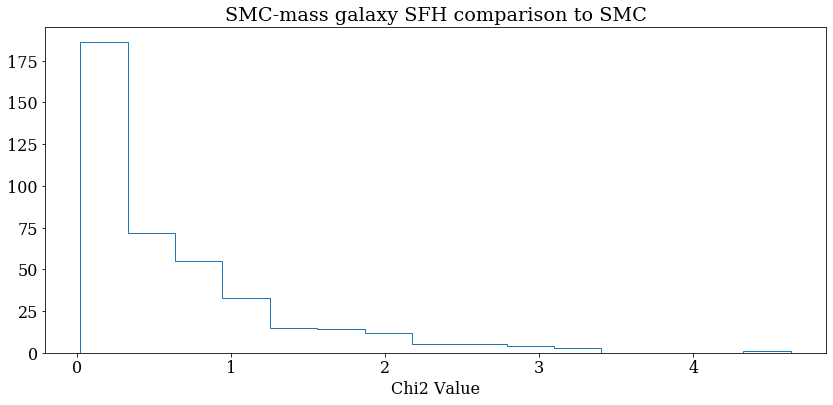

In [70]:
plt.figure(figsize=(14,6))
plt.title('SMC-mass galaxy SFH comparison to SMC')
plt.hist(chi2values_smc_tot,15,histtype='step')
plt.xlabel('Chi2 Value')

In [63]:
# find the lowest 10 Chi2 values
sorted_chi2_smc = np.sort(chi2values_smc_tot)
first10_chi2_smc = sorted_chi2_smc[:10]
# create a mask for the best 10 chi2 fits
mask_goodchi2_smc = np.isin(chi2values_smc_tot,first10_chi2_smc)
print(chi2values_smc_tot[mask_goodchi2_smc])

data_smc_tot = np.vstack((data_smc_cen,data_smc_sat))
print(np.unique(data_smc_tot[:,0])[mask_goodchi2_smc])


[0.03839261 0.03083384 0.03360157 0.02583817 0.02827792 0.02870851
 0.03811284 0.0343145  0.02386489 0.03142625]
[ 14.  21.  27.  41.  47.  48.  52.  71. 362. 395.]


/Users/danny/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


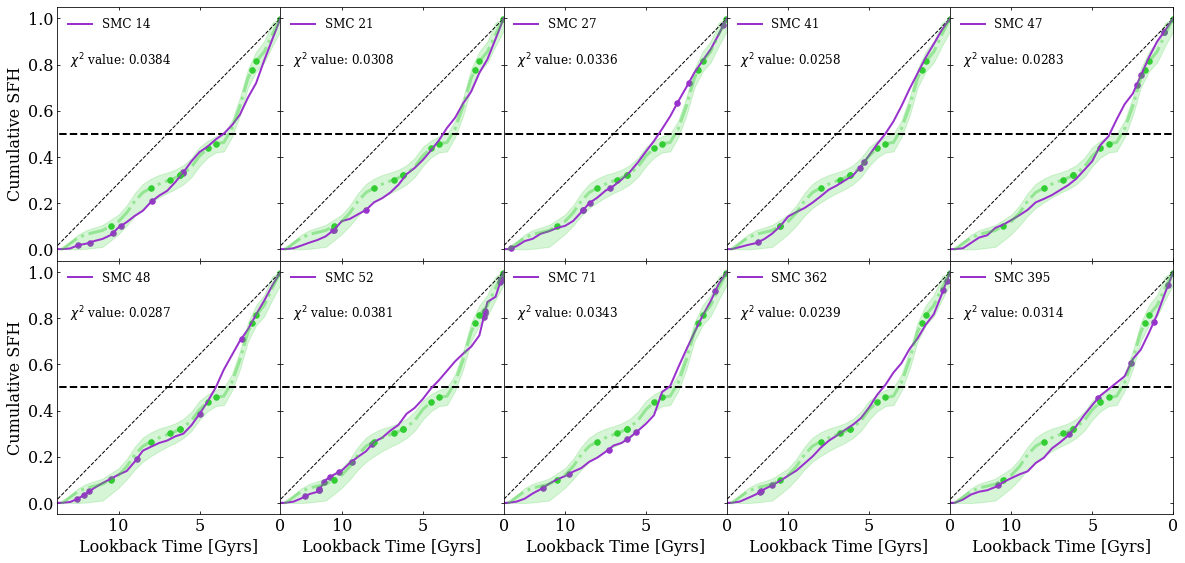

In [64]:
import matplotlib.gridspec as grid

fig = plt.figure(constrained_layout=True,figsize=(20,14))
gs = grid.GridSpec(3,5)
p = 0

smc_analogues2 = np.unique(data_smc_tot[:,0])[mask_goodchi2_smc]

# loop through the analogues, find their respective GCs and plot
for indx,i in enumerate(smc_analogues2):  
#     get the ages for the GCs associated to each galaxy which have Mstar > 5x10^4 Msun
    unique_ids = np.unique(data_smc_tot[:,0])
    indx_unique = np.linspace(0,len(unique_ids)-1,len(unique_ids))
    mask = i == indx_unique
    unique_ids = unique_ids[mask]
    mask_unique = data_smc_tot[:,0]==unique_ids
    masses = data_smc_tot[:,4][mask_unique]
    ages = data_smc_tot[:,5][mask_unique][masses>5e4]
    
    ax = fig.add_subplot(gs[p])
    ax.hlines(0.5,15,-1,linestyle='dashed',color='k',linewidth=2)
    ax.plot((14,0),(0,1),linestyle='dashed',linewidth=1,color='k')
    xs_sims = np.linspace(0,14,29)
    good_cum_mass_smc_tot = cum_mass_smc_tot[mask_goodchi2_smc]
    good_cum_mass_smc_tot_present = cum_mass_smc_tot_present[mask_goodchi2_smc]
    
    obs_ages = scaled_log_time_smc
    ys_sims = good_cum_mass_smc_tot[indx]/np.max(good_cum_mass_smc_tot[indx])
    ys_sims_present = good_cum_mass_smc_tot_present[indx]/np.max(good_cum_mass_smc_tot_present[indx])
    ys_obs = np.interp(xs_sims,obs_ages,cumulative_sfh_smc)
    ys_obs_high = np.interp(xs_sims,obs_ages,cumulative_sfh_smc+high_err_sfh_smc)
    ys_obs_low = np.interp(xs_sims,obs_ages,cumulative_sfh_smc-low_err_sfh_smc)
    ys_gcs = np.interp(ages,xs_sims,ys_sims)    

    ax.plot(xs_sims,ys_sims,lw=2,c='darkorchid',alpha=1,label='SMC '+str(int(i)))
#     ax.plot(xs_sims,ys_sims_present,lw=2,c='k',alpha=1,ls='dashed')
    ax.scatter(ages,ys_gcs,s=30,c='darkorchid',marker='o')
    plt.legend(loc='upper left',fontsize=12,frameon=False)
    
    ys_gcs_obs = np.interp(ages_smc[qflag_smc==1],xs_sims,ys_obs) # here the xs must be in increasing order
    plt.plot(xs_sims,ys_obs,lw=3,alpha=.4, label=r'Observations (W13)',c='limegreen',ls='-.')
    plt.fill_between(xs_sims,ys_obs_low,ys_obs_high,alpha=0.2,color='limegreen')
    plt.text(13,0.8,r'$\chi^{2}$ value: '+str("%.4f" % chi2values_smc_tot[mask_goodchi2_smc][indx]),fontsize=12)
    ax.scatter(ages_smc[qflag_smc==1],ys_gcs_obs,s=30,c='limegreen',marker='o')
    ax.set_ylim(-0.05,1.05)
    ax.set_xlim(13.8,0)
    p+=1
axis = fig.axes

axis[0].set(ylabel='Cumulative SFH')
axis[5].set(ylabel='Cumulative SFH')
# axis[9].set(ylabel='Cumulative SFH')
axis[0].tick_params(direction='in',axis='both',length=3,right=True,top=True,labelbottom=False)
axis[1].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
axis[2].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
axis[3].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
axis[4].tick_params(direction='in',axis='both',length=3,labelbottom=False,labelleft=False,right=True,top=True)
# axis[5].tick_params(direction='in',axis='both',length=3,labelbottom=False,right=True,top=True)
# axis[6].tick_params(direction='in',axis='both',length=3,labelleft=False,labelbottom=False,right=True,top=True)
# axis[7].tick_params(direction='in',axis='both',length=3,labelleft=False,labelbottom=False,right=True,top=True)
# axis[8].tick_params(direction='in',axis='both',length=3,right=True,labelbottom=False,labelleft=False,top=True)
# axis[9].tick_params(direction='in',axis='both',length=3,labelleft=False,labelbottom=False,right=True,top=True)
axis[5].tick_params(direction='in',axis='both',length=3,right=True,top=True)
axis[6].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)
axis[7].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)
axis[8].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)
axis[9].tick_params(direction='in',axis='both',length=3,labelleft=False,right=True,top=True)


axis[5].set(xlabel='Lookback Time [Gyrs]')
axis[6].set(xlabel='Lookback Time [Gyrs]')
axis[7].set(xlabel='Lookback Time [Gyrs]')
axis[8].set(xlabel='Lookback Time [Gyrs]')
axis[9].set(xlabel='Lookback Time [Gyrs]')

axis[8].tick_params(direction='in',axis='both',length=3,right=True,top=True)
axis[3].tick_params(direction='in',axis='both',length=3,right=True,top=True)

gs.update(wspace=0.,hspace=0.)
